In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


#Ignore Warning 
import warnings as wrn
wrn.filterwarnings('ignore')

In [2]:
# Importing the dataset
db = pd.read_csv('empl.csv')

In [3]:
db.head()

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN


In [4]:
db.shape

(22, 6)

In [5]:
db.isnull().sum()

SNo        0
Name       0
Age        3
City       3
Country    0
Salary     3
dtype: int64

In [6]:
db.dtypes

SNo          int64
Name        object
Age        float64
City        object
Country     object
Salary     float64
dtype: object

# EDA

In [7]:
db.drop(['SNo','Name'],axis=1,inplace=True)

In [8]:
db.describe()

,Age,Salary
count,19.000000,19.000000
mean,32.421053,33739.947368
std,7.174924,23151.188084
min,22.000000,3900.000000
25%,27.000000,8888.000000
50%,31.000000,33451.000000
75%,36.000000,54666.000000
max,50.000000,67666.000000


#### check and remove skewness from dataset by using feature transformation

In [9]:
db.skew()

Age       0.973344
Salary    0.289759
dtype: float64

In [10]:
db.kurtosis()

Age       0.572671
Salary   -1.343527
dtype: float64

In [11]:
db['Salary'].describe()

count       19.000000
mean     33739.947368
std      23151.188084
min       3900.000000
25%       8888.000000
50%      33451.000000
75%      54666.000000
max      67666.000000
Name: Salary, dtype: float64

# univariate analysis

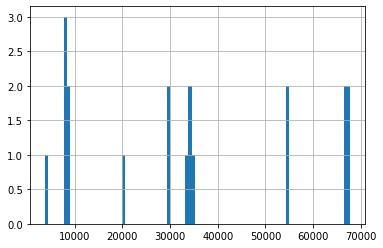

In [12]:
db['Salary'].hist(bins = 100)

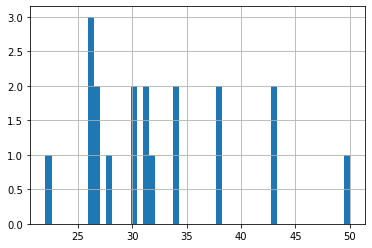

In [13]:
db['Age'].hist(bins = 50)

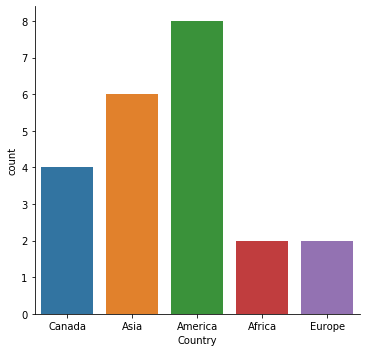

In [14]:
sns.catplot(x="Country", kind="count", data=db)

In [15]:
db['City'].unique()

array(['Toronto', 'Edmonto', 'HongKong', nan, 'BayArea', 'Hyderabad',
       'newyork', 'Congo', 'Angola', 'Finland', 'London'], dtype=object)

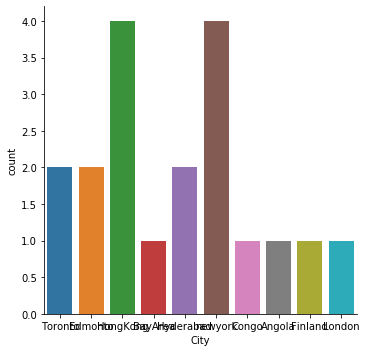

In [16]:
sns.catplot(x="City", kind="count", data=db)

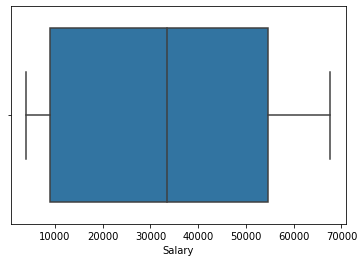

In [17]:
sns.boxplot(db.Salary)

# bivariate analysis

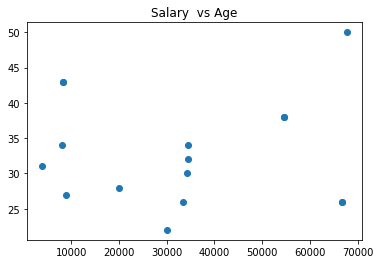

In [18]:
plt.title('Salary  vs Age')
plt.scatter(db['Salary'],db['Age'])

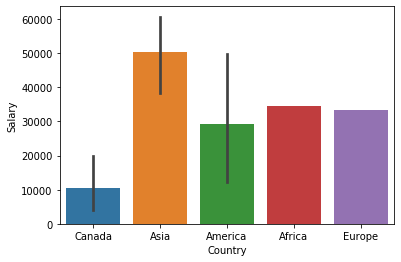

In [19]:
sns.barplot(x="Country", y="Salary",data=db)

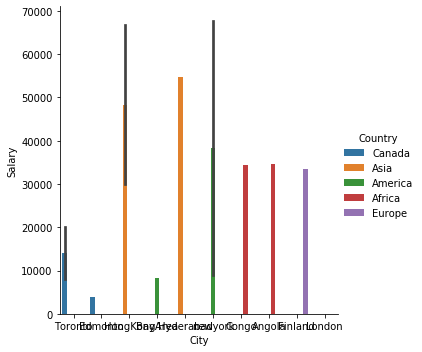

In [20]:
sns.catplot(x="City", y="Salary",hue="Country",kind='bar', data=db)

# missing value treatment

In [21]:
db['Age'].fillna(db['Age'].mean(), inplace=True)
db['Salary'].fillna(db['Salary'].mean(), inplace=True)
db['City'].fillna('Unknown', inplace=True)

In [22]:
db.isnull().sum()

Age        0
City       0
Country    0
Salary     0
dtype: int64

# feature generation

In [23]:
le= LabelEncoder()

In [24]:
db['City']=le.fit_transform(db['City'])
db['Country']=le.fit_transform(db['Country'])
db.head()

,Age,City,Country,Salary
0,28.0,8,3,20000.000000
1,31.0,3,3,3900.000000
2,34.0,8,3,8000.000000
3,26.0,5,2,66672.000000
4,30.0,9,1,33739.947368


# Model

In [48]:
X=db.drop('Salary',axis=1)
y=db['Salary']

In [49]:
from sklearn.preprocessing import StandardScaler
standardScale = StandardScaler()
X_stand = standardScale.fit_transform(X)
y_stand = standardScale.fit_transform(y.values.reshape(-1,1))

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_stand, y_stand, test_size=0.30, random_state=40)

# 1. LinearRegression

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model= lr.fit(X_train,Y_train)


In [52]:
# generate predictions
predictions = model.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(Y_test,predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE:", lin_rmse)

RMSE: 1.5785410044570893


### find best parametrers using gridsearhCV and also check and remove overfitting and underfitting problem by using hyperparameter tuning

In [102]:
def Snippet(model, X_test, y_test,X_train,y_train,parameters): 
    
    print(format('How to find parameters using GridSearchCV  for Regression','*^82'))    
    
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    from sklearn.model_selection import GridSearchCV
    #print(model,parameters)
    
    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 10,refit=True, n_jobs=-1)
    grid.fit(X_train, y_train)   
    
    y_pred = grid.best_estimator_.predict(X_test)
    train_y_pred = grid.best_estimator_.predict(X_train)
    test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    train_RMSE = np.sqrt(mean_squared_error(y_train, train_y_pred))
    
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    
    
    # Results from Grid Search
    print("\n========================================================")
    print(" Results from Grid Search " )
    print("========================================================")    
    
    print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
    print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
    print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
                                    
    print("\n The train_RMSE across ALL models:\n",
          train_RMSE)
                                    
    print("\n The test_RMSE across ALL models:\n",
          test_RMSE) 
    
    print (plt.show())
    
    print("\n ========================================================")

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.03, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=0.2, tree_method=None,
       validate_parameters=False, verbosity=None)

 The best score across ALL searched params:
 -1895.145082117947

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.2}

 The train_RMSE across ALL models:
 0.8326339380647853

 The test_RMSE across AL

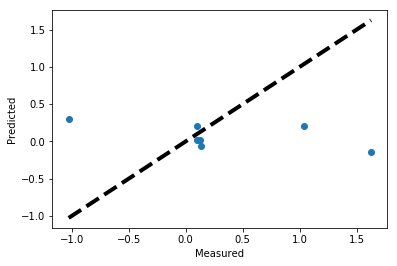

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.2, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

 The best score across ALL searched params:
 -1898.262598515291

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.2}

 The train_RMSE across ALL models:
 0.87970081787889

 The test_RMSE across ALL models:
 0.8648004408971861


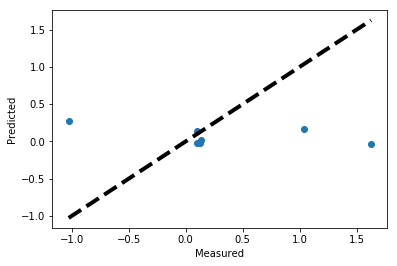

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=50, verbose=0, warm_start=False)

 The best score across ALL searched params:
 -2461.109863285078

 The best parameters across ALL searched params:
 {'max_depth': 4, 'min_samples_leaf': 3, 'n_estimators': 100, 'random_state': 50}

 The train_RMSE across ALL models:
 0.8174981810092293

 The test_RMSE across ALL models:
 0.9610155936714377


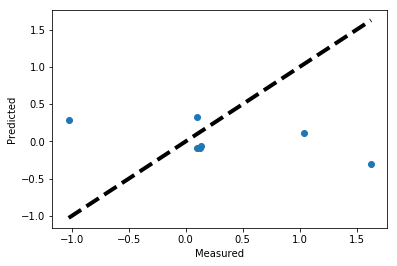

None



In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
alg = [XGBRegressor(), GradientBoostingRegressor(),RandomForestRegressor()]
parameters = [{'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
                
              {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
              {'max_depth'    : [4,6,8],
              'n_estimators' : [100,500,1000],
              'min_samples_leaf':[1,2,3],
              'random_state': [40,45,50]}
             ]


for i in range(len(alg)):
    #print(alg[i])
                          
    Snippet(alg[i] ,X_test, Y_test,X_train,Y_train,parameters[i])

#### bar plot of features importances

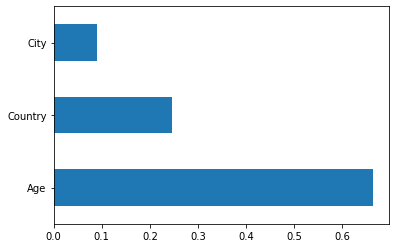

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train,Y_train)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest()
feat_importances.plot(kind='barh')

here,'Age' features is important for model.

## save model

In [55]:
import pickle

In [56]:
filename='empl_GradientBoostingRegressor_model.sav'

In [57]:
pickle.dump(model, open(filename, 'wb'))

In [58]:
load_lr_model =pickle.load(open(filename, 'rb'))